In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

In [2]:
df = pd.read_csv('conhecimento_filtrado.csv')
print(len(df))

82053


In [3]:
df1 = df[df.verifica==1].copy()
print(len(df1))
df3 = df[df.verifica==3].copy()
print(len(df3))

12893
58764


In [4]:
cols = ['ndvi', 'nbrl', 'dif_ndvi', 'dif_dnbrl', 'medianb2', 'medianb3',
       'medianb4', 'medianb5', 'medianb6', 'medianb7']

In [5]:
def gera_sumario(df):
    dados = []
    for c in cols:
        d = df[c]
        
        dados.append([
            c, # coluna
            d.mean(),   # media
            d.median(), # mediana
            d.std()**2, # variancia
            d.std(),    # std
        ])
    sumario = pd.DataFrame(dados, columns=['coluna', 'media', 'mediana', 'variancia', 'std'])
    sumario = sumario.sort_values('std', ascending=False).copy().reset_index(drop=True)
    return sumario

In [6]:
sumario1 = gera_sumario(df1)
sumario1

,coluna,media,mediana,variancia,std
0,dif_dnbrl,0.219081,0.204493,0.005412,0.073563
1,nbrl,0.033617,0.027433,0.003665,0.060538
2,dif_ndvi,0.146331,0.134606,0.003315,0.057580
3,ndvi,0.242701,0.241410,0.002377,0.048756
4,medianb6,0.224127,0.223159,0.001320,0.036335
5,medianb7,0.171777,0.170776,0.000993,0.031506
6,medianb5,0.183776,0.184050,0.000788,0.028076
7,medianb4,0.111172,0.109298,0.000373,0.019318
8,medianb3,0.092967,0.092247,0.000129,0.011359
9,medianb2,0.104896,0.103595,0.000083,0.009136


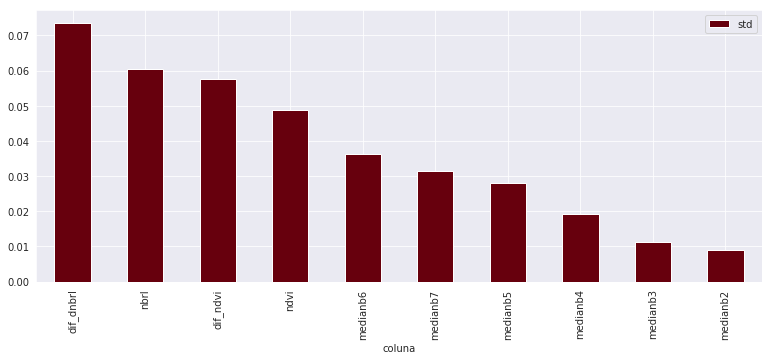

In [7]:
sumario1.plot(x="coluna", y=['std'], kind="bar", colormap='Reds_r', figsize=(13,5))

In [8]:
melhor = sumario1.coluna.loc[0]
pior = sumario1.coluna.loc[len(sumario1)-1]

dado discrepante melhor coluna dif_dnbrl


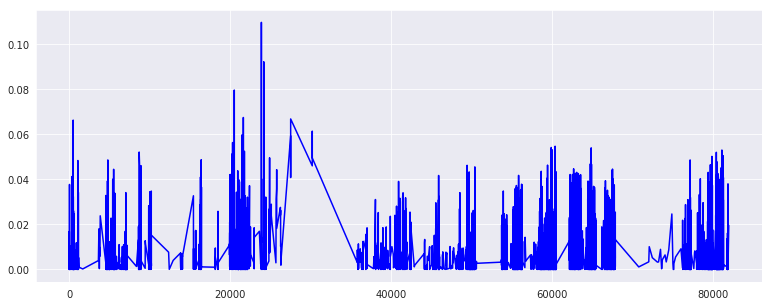

In [9]:
((df1[melhor]-df1[melhor].mean())**2).plot(c='b', figsize=(13,5))
print('dado discrepante melhor coluna', melhor)

dado discrepante pior coluna medianb2


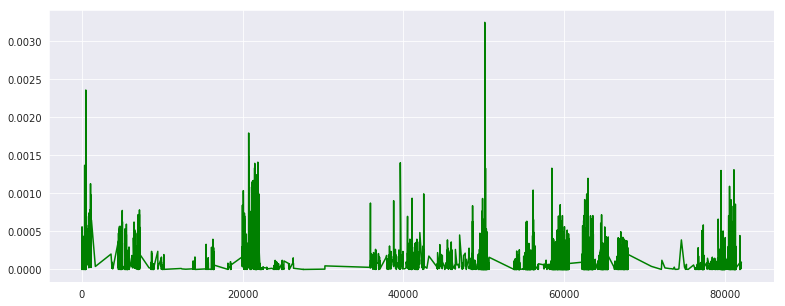

In [10]:
((df1[pior]-df1[pior].mean())**2).plot(c='g', figsize=(13,5))
print('dado discrepante pior coluna', pior)

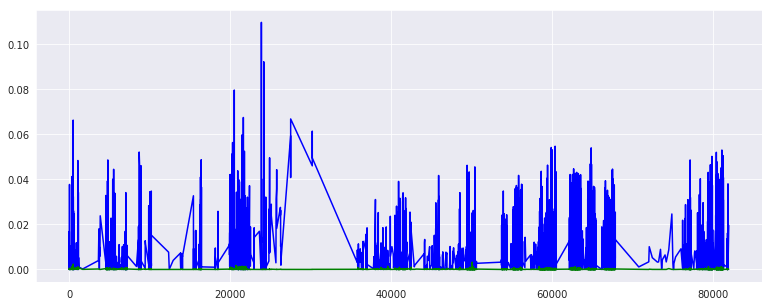

In [11]:
((df1[melhor]-df1[melhor].mean())**2).plot(c='b', figsize=(13,5))
((df1[pior]-df1[pior].mean())**2).plot(c='g', figsize=(13,5))


In [12]:
sumario3 = gera_sumario(df3)
sumario3

,coluna,media,mediana,variancia,std
0,dif_dnbrl,0.255406,0.246149,0.005375,0.073314
1,nbrl,0.176936,0.184138,0.004691,0.068492
2,ndvi,0.327203,0.332700,0.004336,0.065848
3,dif_ndvi,0.211014,0.204514,0.003792,0.061576
4,medianb6,0.286728,0.286767,0.001839,0.042884
5,medianb5,0.280119,0.278294,0.001700,0.041236
6,medianb3,0.132807,0.125450,0.001057,0.032513
7,medianb2,0.138402,0.130546,0.001038,0.032218
8,medianb7,0.195441,0.192850,0.001026,0.032034
9,medianb4,0.142140,0.137945,0.000835,0.028897


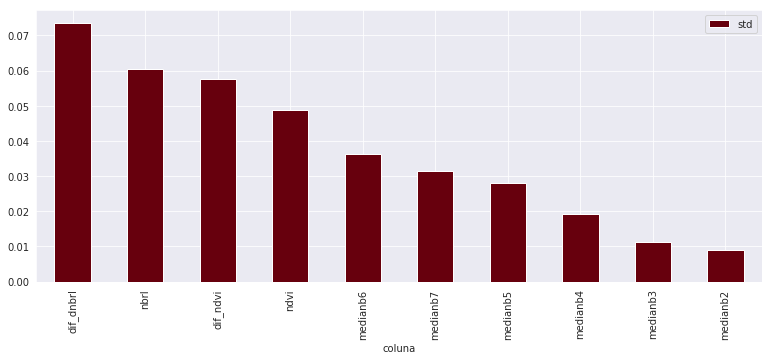

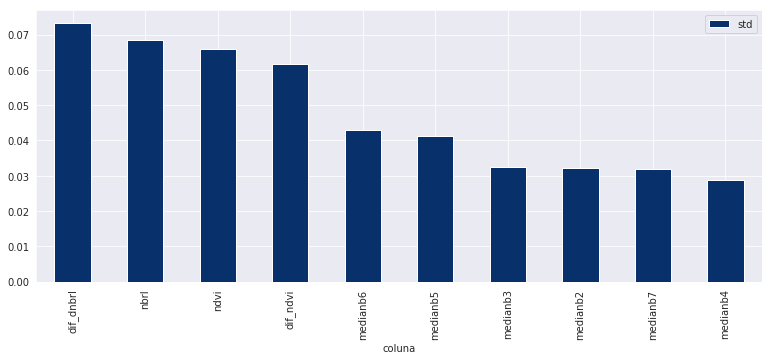

In [13]:
(sumario1).plot(x="coluna", y=['std'], kind="bar", colormap='Reds_r', figsize=(13,5))
(sumario3).plot(x="coluna", y=['std'], kind="bar", colormap='Blues_r', figsize=(13,5))